# PHÂN CỤM ĐỒ THỊ AMAZON VỚI TECTONIC

## Import thư viện và các biến/hằng

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.quality import partition_quality
from networkx.algorithms.community.quality import modularity
from collections import defaultdict

SOURCE_PATH = '/content/drive/MyDrive/Colab-Notebooks/Tectonic-master/'
AMAZON_PATH = os.path.join(SOURCE_PATH, 'Amazon')
DBLP_PATH = os.path.join(SOURCE_PATH, 'DBLP')
YOUTUBE_PATH = os.path.join(SOURCE_PATH, 'Youtube')

amazon_numbers_of_nodes = 334863
dblp_numbers_of_nodes = 317080
youtube_numbers_of_nodes = 1134890

threshold_values = np.linspace(0, .2, 21)
threshold_values = np.append(threshold_values, [1, 2, 3])

## Xử lí đồ thị, phân cụm trên nhiều ngưỡng và sơ lược kết quả

In [ ]:
# %%bash
# cd '/content/drive/MyDrive/Colab-Notebooks/Tectonic-master/Amazon'
# # mkdir 'Output'
# chmod +x ../mace222/mace

# # Step 1
# python ../relabel-graph.py com-amazon.ungraph.txt com-amazon.top5000.cmty.txt amazon.mace amazon.communities

# # Step 2, 3
# python ../mace-to-list.py amazon.mace amazon.edges
# ../mace222/mace C -l 3 amazon.mace _geq3_amazon.triangles
# python ../_mace-u3.py _geq3_amazon.triangles amazon.triangles

# # Step 4, 5
# python ../community-stats.py amazon.edges amazon.communities amazon.edges.stats
# python ../community-stats.py amazon.triangles amazon.communities amazon.triangles.stats

# # Step 6, 7
# python ../weighted-edges.py amazon.triangles amazon.edges amazon.out.graph amazon.out.mixed 667129
# python ../normalized-edges.py amazon.out.mixed amazon.out.norm

# # Step 8
# g++ -std=c++11 -o triangle_clusters ../triangle-clusters.cpp
# chmod +x triangle_clusters
# ./triangle_clusters amazon.out.norm 334863 0.1 > amazon_clusters.txt

# # Step 9
# python ../grade-clusters.py amazon.communities amazon_clusters.txt output.txt

In [ ]:
start_time = time.time()

In [ ]:
%%bash
cd '/content/drive/MyDrive/Colab-Notebooks/Tectonic-master/Amazon'
chmod +x ../mace222/mace
chmod +x triangle_clusters

# Step 1
python ../relabel-graph.py com-amazon.ungraph.txt com-amazon.top5000.cmty.txt amazon.mace amazon.communities

# Step 2, 3
python ../mace-to-list.py amazon.mace amazon.edges
../mace222/mace C -l 3 amazon.mace _geq3_amazon.triangles
python ../_mace-u3.py _geq3_amazon.triangles amazon.triangles

# Step 6, 7
python ../weighted-edges.py amazon.triangles amazon.edges amazon.out.graph amazon.out.mixed 667129
python ../normalized-edges.py amazon.out.mixed amazon.out.norm

# Step 8
./triangle_clusters amazon.out.norm 334863 0.1 > amazon_clusters.txt

# Step 9
python ../grade-clusters.py amazon.communities amazon_clusters.txt output.txt

1010472
0
0
0
667129
275961
61551
5799
32
p: 0.94328 r: 0.94016


sgraph: amazon.mace ,#nodes 334863 ,#edges 925872 ,#arcs 0
 output to: _geq3_amazon.triangles
iters=0


In [ ]:
end_time = time.time()

In [ ]:
for t in range(threshold_values.shape[0]):
    clusters_file_name = 'Output/amazon_clusters_t' + str(threshold_values[t]) + '.txt'
    output_file_name = 'Output/output_t' + str(threshold_values[t]) + '.txt'

    if not os.path.isfile(os.path.join(AMAZON_PATH, clusters_file_name)) and not os.path.isfile(os.path.join(AMAZON_PATH, output_file_name)):
        threshold_value = threshold_values[t]
        !cd $AMAZON_PATH && ./triangle_clusters amazon.out.norm $amazon_numbers_of_nodes $threshold_value > $clusters_file_name

        print(f't: {threshold_values[t]} ', end='')
        !cd $AMAZON_PATH && python ../grade-clusters.py amazon.communities $clusters_file_name $output_file_name

t: 0.11 p: 0.95186 r: 0.93262
t: 0.12 p: 0.95700 r: 0.92349
t: 0.13 p: 0.96371 r: 0.91463
t: 0.14 p: 0.96652 r: 0.90810
t: 0.15 p: 0.96860 r: 0.89835
t: 0.16 p: 0.97099 r: 0.88560
t: 0.17 p: 0.97591 r: 0.86464
t: 0.18 p: 0.97724 r: 0.85857
t: 0.19 p: 0.98016 r: 0.84387
t: 0.2 p: 0.98236 r: 0.84158


In [ ]:
Ts, Ps, Rs, F1s = [], [], [], []

for t in range(1, threshold_values.shape[0] - 3):
    output_file_name = 'Output/output_t' + str(threshold_values[t]) + '.txt'

    re = pd.read_csv(os.path.join(AMAZON_PATH, output_file_name), sep=' ', header=None)
    re.columns = ['size', 'p', 'r']
    re['f1'] = 2 * re['p'] * re['r'] / (re['p'] + re['r'])

    scores = np.round_(re.mean(), 4)
    print('t:', threshold_values[t], 'p:', scores['p'], 'r:', scores['r'], 'f1:', scores['f1'])

    Ts.append(re)
    Ps.append(re.mean()['p'])
    Rs.append(re.mean()['r'])
    F1s.append(re.mean()['f1'])

t: 0.01 p: 0.852 r: 0.9598 f1: 0.8515
t: 0.02 p: 0.8533 r: 0.9598 f1: 0.8527
t: 0.03 p: 0.8578 r: 0.9598 f1: 0.8576
t: 0.04 p: 0.862 r: 0.9593 f1: 0.8621
t: 0.05 p: 0.869 r: 0.9585 f1: 0.8695
t: 0.06 p: 0.8917 r: 0.9565 f1: 0.8911
t: 0.07 p: 0.9033 r: 0.9536 f1: 0.9012
t: 0.08 p: 0.9193 r: 0.948 f1: 0.9118
t: 0.09 p: 0.9289 r: 0.944 f1: 0.9172
t: 0.1 p: 0.9433 r: 0.9402 f1: 0.9262
t: 0.11 p: 0.9519 r: 0.9326 f1: 0.9276
t: 0.12 p: 0.957 r: 0.9235 f1: 0.925
t: 0.13 p: 0.9637 r: 0.9146 f1: 0.9235
t: 0.14 p: 0.9665 r: 0.9081 f1: 0.9205
t: 0.15 p: 0.9686 r: 0.8984 f1: 0.915
t: 0.16 p: 0.971 r: 0.8856 f1: 0.9067
t: 0.17 p: 0.9759 r: 0.8646 f1: 0.896
t: 0.18 p: 0.9772 r: 0.8586 f1: 0.8914
t: 0.19 p: 0.9802 r: 0.8439 f1: 0.8815
t: 0.2 p: 0.9824 r: 0.8416 f1: 0.8808


## Phân tích dữ liệu đầu vào

### Đồ thị Amazon

In [ ]:
def see_detail(G):
    print("Số nút  N :", len(G.nodes))
    print("Số cạnh  E :", len(G.edges))
    print("Bậc trung bình 〈k〉:", np.array([G.degree(n) for n in G.nodes()]).mean())
    print("Hệ số phân cụm 〈C〉:", nx.average_clustering(G))

def draw_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    degree_dist = nx.degree_histogram(G)
    total_degrees = sum(degree_dist)
    p_k = [degree_count / total_degrees for degree_count in degree_dist]

    plt.bar(range(len(p_k)), p_k)
    plt.title('Degree Distribution by $log$')
    plt.xlabel('Degree $log(k)$')
    plt.ylabel('Probability $log(\mathcal{P}(k))$')
    plt.xscale('log')
    plt.yscale('log')

def draw_triangle_dist(G):
    t, p_t = np.unique(np.array(list(nx.triangles(G).values())), return_counts=True)
    p_t = p_t / p_t.sum()

    plt.bar(t, p_t, color='orange')
    plt.title('Triangle Distribution by $log$')
    plt.xlabel('Triangle $log(t)$')
    plt.ylabel('Probability $log(\mathcal{P}(t))$')
    plt.xscale('log')
    plt.yscale('log')

- Dataset là đồ thị vô hướng, được kết nối và không trọng số.
- Đồ thị Amazon với các đỉnh là mặt hàng mà khách hàng mua ở trang web Amazon, cạnh là khi khác hàng đồng mua hai sản phẩm.
- Các cộng đồng youtube (ground-truth): là danh mục các sản phẩm theo thực tế với các danh mục không có ít hơn 3 sản phẩm.
- Top 5000 cộng đồng được Amazon cung cấp có chất lượng tốt nhất.

Số nút  N : 334863
Số cạnh  E : 925872
Bậc trung bình 〈k〉: 5.529855493141971
Hệ số phân cụm 〈C〉: 0.39674639327875916


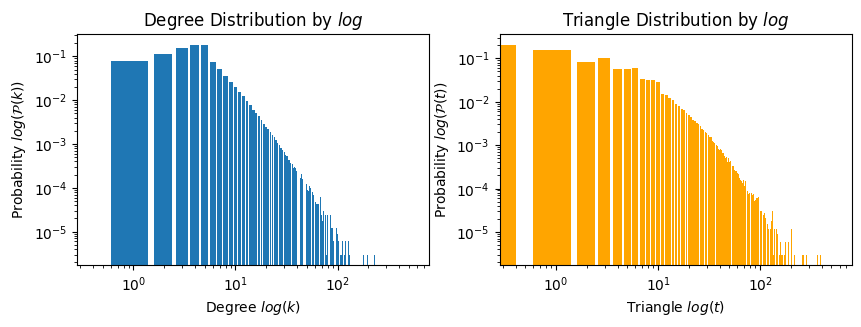

In [ ]:
np.random.seed(seed=1)
amazon_graph = nx.read_edgelist(os.path.join(AMAZON_PATH, 'amazon.edges'))

# Graph description
see_detail(amazon_graph)

# Draw degree distribution
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
draw_degree_dist(amazon_graph)
plt.subplot(1, 2, 2)
draw_triangle_dist(amazon_graph)

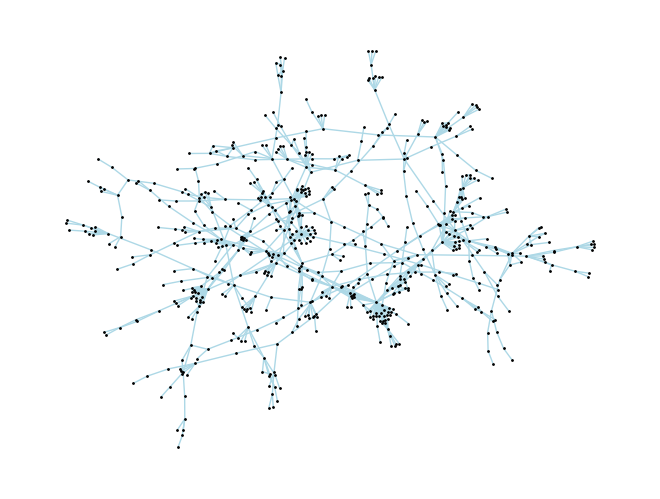

In [ ]:
# Extract subgraph
accepted_probability = .18
node_degrees = np.array(amazon_graph.degree()).astype(int)
sub_nodes = node_degrees[np.random.random(node_degrees.shape[0]) <= accepted_probability][:, 0]
amazon_subgraph = amazon_graph.subgraph(max(nx.connected_components(amazon_graph.subgraph(sub_nodes.astype(str))), key=len)).copy()

# Draw subgraph
plt.figure()
nx.draw(amazon_subgraph, with_labels=False, node_size=1, node_color='black', edge_color='lightblue')

### Top5000 cộng đồng (theo Amazon)

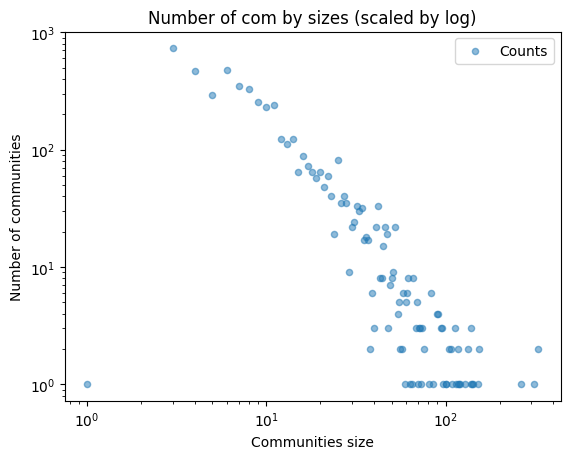

In [ ]:
coms = open(os.path.join(AMAZON_PATH, 'amazon.communities'))
top_coms = []
com_sizes = []
count_sizes = defaultdict(lambda: 0)

for c in coms:
    top_coms.append(c.strip().split())
    com_sizes.append(len(top_coms[-1]))
    count_sizes[len(top_coms[-1])] += 1

coms.close()

plt.scatter(count_sizes.keys(), count_sizes.values(), alpha=.5, s=20, label='Counts')
plt.title('Number of com by sizes (scaled by log)')
plt.xlabel('Communities size')
plt.ylabel('Number of communities')
plt.xscale('log')
plt.yscale('log')
plt.legend()

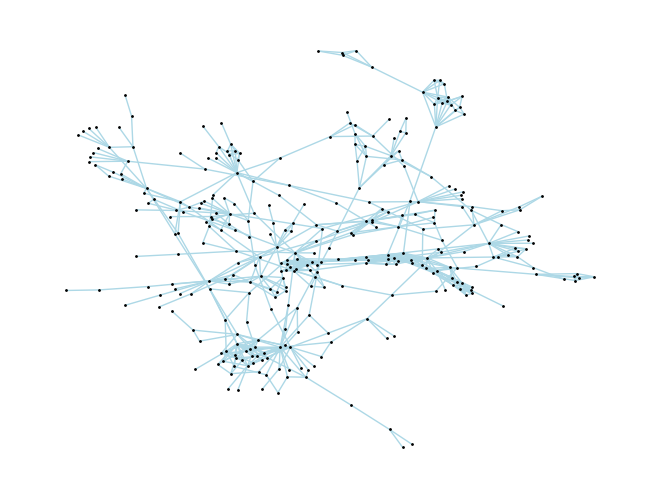

In [ ]:
largest_com = amazon_graph.subgraph(top_coms[np.argmax(list(com_sizes))]).copy()
nx.draw(largest_com, with_labels=False, node_size=1, node_color='black', edge_color='lightblue')

## Phân tích kết quả phân cụm

### Kết quả trên ngưỡng tốt nhất (theo thực nghiệm lại) và so sánh với top5000

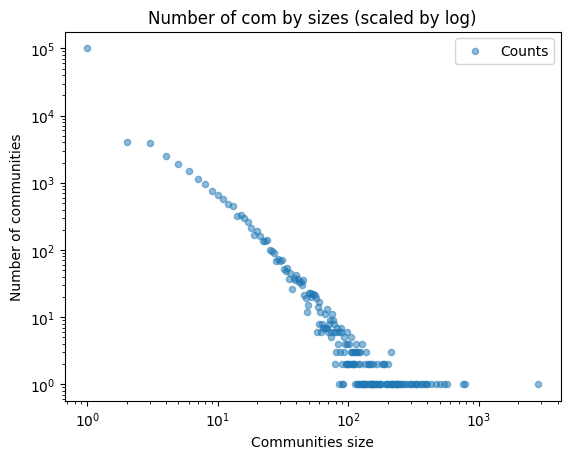

In [ ]:
coms = open(os.path.join(AMAZON_PATH, 'amazon_clusters.txt'))
tectonic_coms = []
tectonic_com_sizes = []
tectonic_count_sizes = defaultdict(lambda: 0)

for c in coms:
    tectonic_coms.append(c.strip().split())
    tectonic_com_sizes.append(len(tectonic_coms[-1]))
    tectonic_count_sizes[len(tectonic_coms[-1])] += 1

coms.close()

plt.scatter(tectonic_count_sizes.keys(), tectonic_count_sizes.values(), alpha=.5, s=20, label='Counts')
plt.title('Number of com by sizes (scaled by log)')
plt.xlabel('Communities size')
plt.ylabel('Number of communities')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [ ]:
coms = open(os.path.join(AMAZON_PATH, 'amazon_clusters.txt'))
tectonic_coms = []
tectonic_com_sizes = []

for c in coms:
    tectonic_coms.append(c.strip().split())
    tectonic_com_sizes.append(len(tectonic_coms[-1]))

coms.close()
pd.DataFrame(tectonic_com_sizes, columns=['size']).describe()

,size
count,123325.000000
mean,2.715289
std,12.307200
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2830.000000


In [ ]:
# Experimental result
print('Time:', end_time - start_time)
print('Modularity:', modularity(amazon_graph, tectonic_coms, weight='weight', resolution=1))

Time: 32.92864775657654
Modularity: 0.6284261496890343


In [ ]:
tectonic_df = pd.read_csv(os.path.join(AMAZON_PATH, 'output.txt'), sep=' ', header=None)
tectonic_df.columns = ['size', 'p', 'r']
tectonic_df['f1'] = 2 * tectonic_df['p'] * tectonic_df['r'] / (tectonic_df['p'] + tectonic_df['r'])
tectonic_df

,size,p,r,f1
0,3,1.0,1.0,1.0
1,3,1.0,1.0,1.0
2,5,1.0,1.0,1.0
3,4,1.0,1.0,1.0
4,3,1.0,1.0,1.0
...,...,...,...,...
4995,3,1.0,1.0,1.0
4996,3,1.0,1.0,1.0
4997,3,1.0,1.0,1.0
4998,3,1.0,1.0,1.0


- Các cụm có kích thước từ 3 -> 328 và trung bình là ~13.5.
- Precision và recall trung bình lần lượt là ~0.93 và ~0.8, các giá trị p và r trên các cụm trải dài từ 0 -> 1.
- F1-score trung bình ~0.83.

In [ ]:
tectonic_df.describe()

,size,p,r,f1
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,13.492400,0.943285,0.940157,0.926243
std,17.516555,0.139038,0.147004,0.138572
min,3.000000,0.021550,0.112150,0.042118
25%,5.000000,0.961540,1.000000,0.909089
50%,8.000000,1.000000,1.000000,1.000000
75%,15.000000,1.000000,1.000000,1.000000
max,328.000000,1.000000,1.000000,1.000000


- Precision có xu hướng tăng khi kích thước cộng đồng tăng.
- Recall là ngược lại, xu hướng giảm khi kích thước cộng đồng tăng.
- Nhìn chung kết quả p và r đều khá cao.

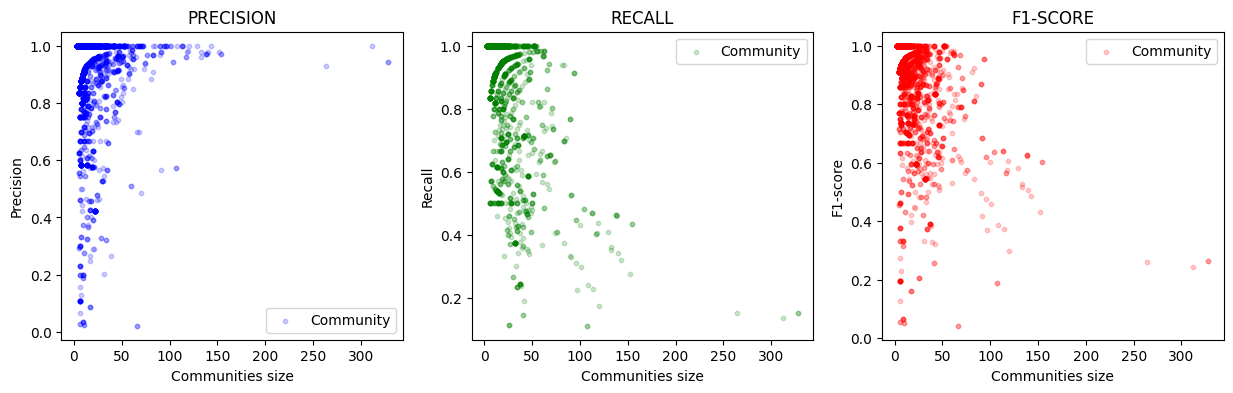

In [ ]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.scatter(tectonic_df['size'], tectonic_df['p'], alpha=.2, color='b', s=10, label='Community')
plt.title('PRECISION')
plt.xlabel('Communities size')
plt.ylabel('Precision')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(tectonic_df['size'], tectonic_df['r'], alpha=.2, color='g', s=10, label='Community')
plt.title('RECALL')
plt.xlabel('Communities size')
plt.ylabel('Recall')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(tectonic_df['size'], tectonic_df['f1'], alpha=.2, color='r', s=10, label='Community')
plt.title('F1-SCORE')
plt.xlabel('Communities size')
plt.ylabel('F1-score')
plt.legend()

### Kết quả trên nhiều ngưỡng

In [ ]:
moduls = []

for t in range(1, threshold_values.shape[0] - 3):
    clusters_file_name = 'Output/amazon_clusters_t' + str(threshold_values[t]) + '.txt'

    coms = open(os.path.join(AMAZON_PATH, clusters_file_name))
    tc = []

    for c in coms:
        tc.append(c.strip().split())

    coms.close()
    moduls.append(modularity(amazon_graph, tc))

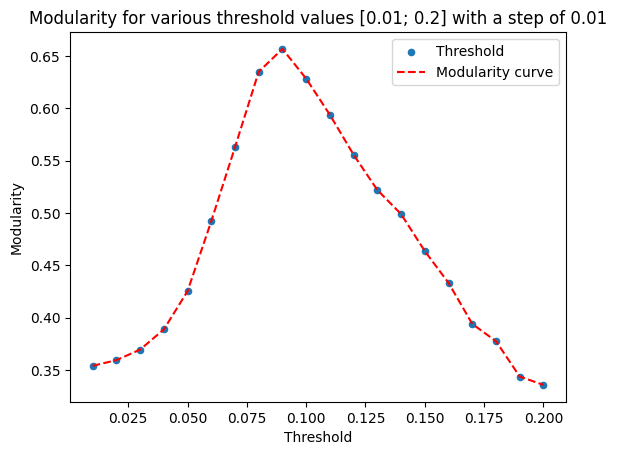

In [ ]:
plt.scatter(threshold_values[1:-3], moduls, s=20, label='Threshold')
plt.plot(threshold_values[1:-3], moduls, color='r', linestyle='--', label='Modularity curve')
plt.title('Modularity for various threshold values [0.01; 0.2] with a step of 0.01')
plt.xlabel('Threshold')
plt.ylabel('Modularity')
plt.legend()

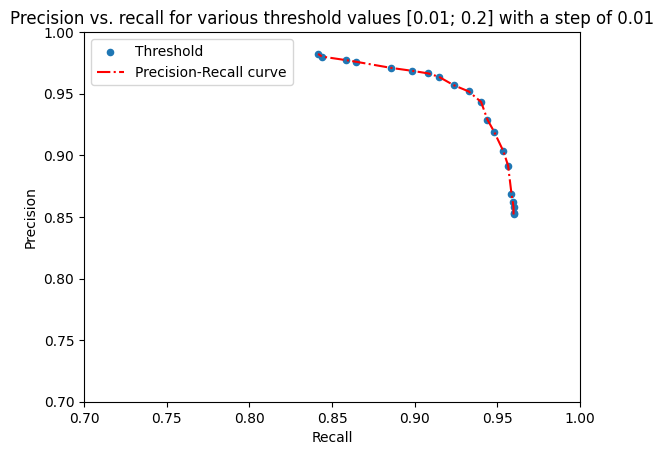

In [ ]:
plt.scatter(Rs, Ps, s=20, label='Threshold')
plt.plot(Rs, Ps, color='r', linestyle='-.', label='Precision-Recall curve')
plt.title('Precision vs. recall for various threshold values [0.01; 0.2] with a step of 0.01')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim(.7, 1)
plt.ylim(.7, 1)
plt.legend()